In [1]:
%cd /content/drive/MyDrive/2) Own datset model

/content/drive/MyDrive/2) Own datset model


In [2]:
import numpy as np
import h5py
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, LeakyReLU, Flatten, Input, LSTM, Reshape, TimeDistributed
from tensorflow.keras.models import Model
import argparse
import matplotlib.pyplot as plt
import sys

In [3]:
np.set_printoptions(threshold=5)
#np.set_printoptions(threshold=sys.maxsize)

In [4]:
import numpy as np

# Path to your .npz file
data_file = "x1.npz"

with np.load(data_file) as data:
  # Access arrays by their names in the archive
  x1 = np.array(data["x1"])

data_file = "y1.npz"

with np.load(data_file) as data:
  # Access arrays by their names in the archive
  y1 = np.array(data["y1"])

In [5]:
x1.shape

(300000, 1024, 2)

In [6]:
y1.shape

(300000,)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2)

In [8]:
X_train.shape

(240000, 1024, 2)

In [9]:
y_train.shape

(240000,)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1024,2)),
    tf.keras.layers.Reshape(target_shape=(1024,2,1)),
    tf.keras.layers.Conv2D(32, (3, 2), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32, (3, 2), activation='relu', padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 1024, 2, 1)        0         
                                                                 
 conv2d (Conv2D)             (None, 1024, 2, 32)       224       
                                                                 
 conv2d_1 (Conv2D)           (None, 1024, 2, 32)       6176      
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 64)                4194368   
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 4200898 (16.03 MB)
Trainable params: 42008

In [11]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [12]:
X, X_val, y, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [13]:
NUM_EPOCHS = 15
validation_split = 0.2

history = model.fit(X_train, y_train, epochs=NUM_EPOCHS, validation_data=(X_val, y_val),verbose =1)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


7500/7500 [==============================] - 48s 6ms/step - loss: 0.3765 - accuracy: 0.8131 - val_loss: 0.3913 - val_accuracy: 0.7887
Epoch 2/15
7500/7500 [==============================] - 43s 6ms/step - loss: 0.3226 - accuracy: 0.8457 - val_loss: 0.2860 - val_accuracy: 0.8670
Epoch 3/15
7500/7500 [==============================] - 41s 5ms/step - loss: 0.2799 - accuracy: 0.8697 - val_loss: 0.2342 - val_accuracy: 0.8971
Epoch 4/15
7500/7500 [==============================] - 41s 5ms/step - loss: 0.2351 - accuracy: 0.8942 - val_loss: 0.1784 - val_accuracy: 0.9234
Epoch 5/15
7500/7500 [==============================] - 41s 5ms/step - loss: 0.1909 - accuracy: 0.9172 - val_loss: 0.1296 - val_accuracy: 0.9517
Epoch 6/15
7500/7500 [==============================] - 42s 6ms/step - loss: 0.1501 - accuracy: 0.9371 - val_loss: 0.1109 - val_accuracy: 0.9599
Epoch 7/15
7500/7500 [==============================] - 43s 6ms/step - loss: 0.1194 - accuracy: 0.9517 - val_loss: 0.0805 - val_accuracy: 0.9

In [ ]:
#model.save("15_OWN_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


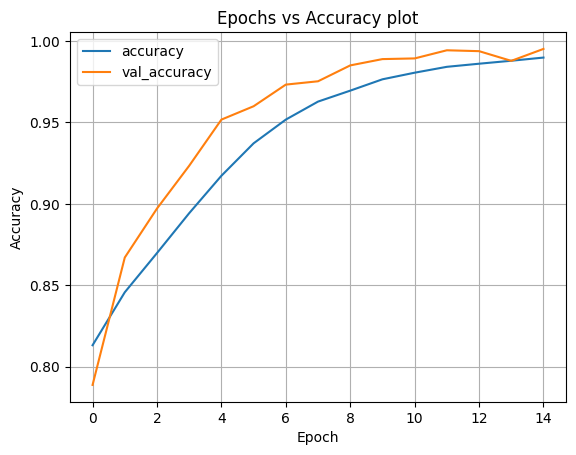

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy plot')
plt.grid(True)
plt.legend()

plt.show()

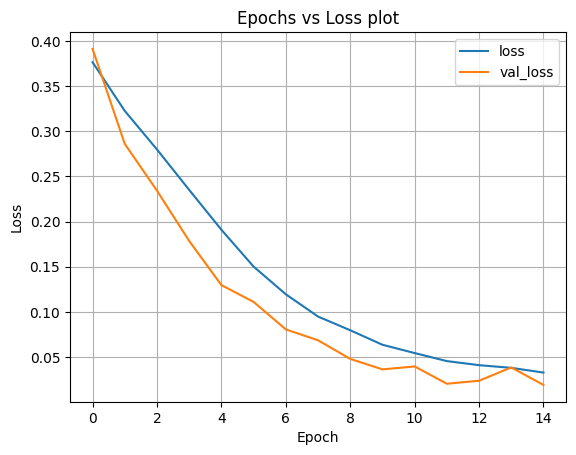

In [15]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epochs vs Loss plot')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Loss: ' + str(score[0]))
print('Acc: ' + str(score[1]))

1875/1875 [==============================] - 5s 3ms/step - loss: 1.4245 - accuracy: 0.8292
Loss: 1.4245388507843018
Acc: 0.8291833400726318
